In [52]:
import pandas as pd
import requests
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [9]:
Clean_Data = Path("../Work_Hawa/Cleaned_Data/visualization.csv")
Clean_Data_df = pd.read_csv(Clean_Data, encoding="utf-8")


In [66]:
summary_stats=Clean_Data_df[['US Avg. Higher Edu', 'US Homeownership']].describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
US Avg. Higher Edu,18.0,30.611111,2.998605,26.7,28.000,30.00,32.575,35.8
US Homeownership,18.0,65.772222,1.579205,63.4,64.525,65.65,66.825,68.8


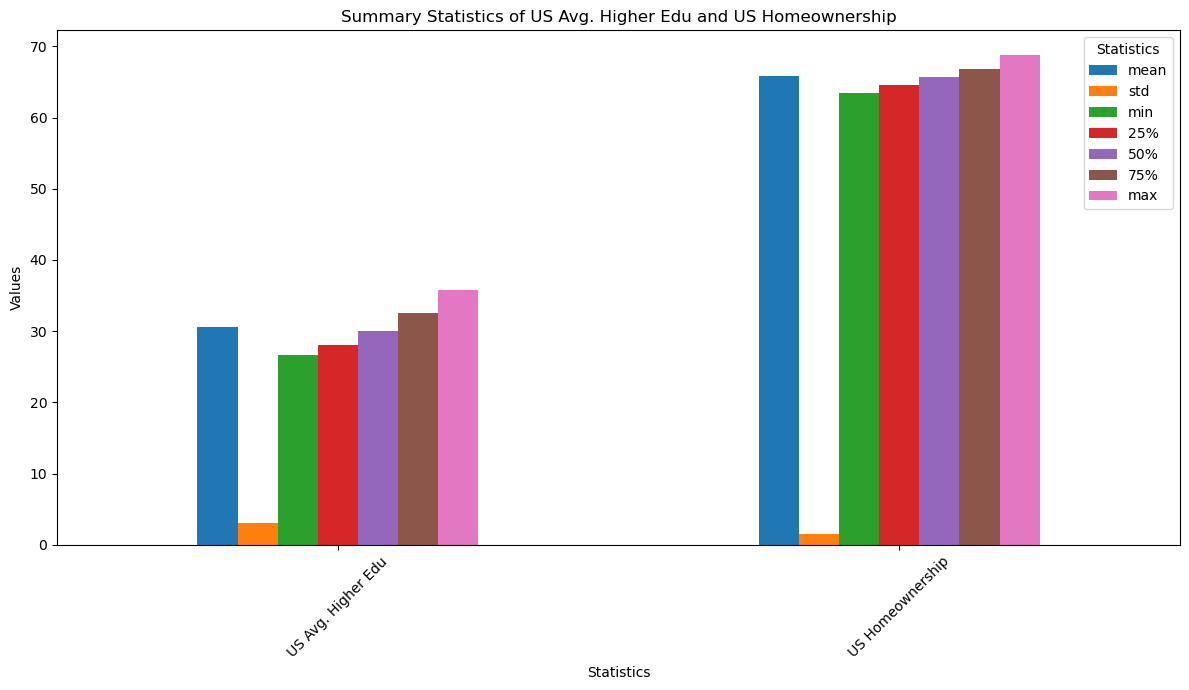

In [67]:
# Plotting the bar chart for each descriptive statistic
summary_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].plot(kind='bar', figsize=(12, 7))

# Title and labels
plt.title('Summary Statistics of US Avg. Higher Edu and US Homeownership')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Statistics')

# Show plot
plt.show()

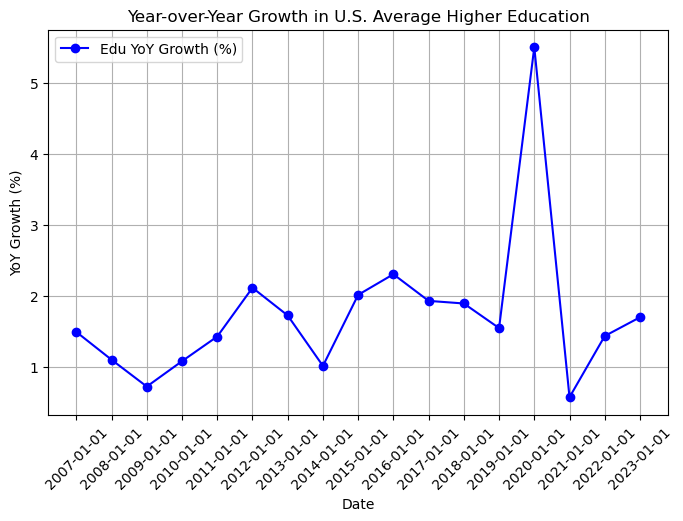

In [39]:
#Year over year percentage growth in higher education
Clean_Data_df['Edu YoY Growth'] = Clean_Data_df['US Avg. Higher Edu'].pct_change() * 100
plt.figure(figsize=(8, 5))
plt.plot(Clean_Data_df['Date'], Clean_Data_df['Edu YoY Growth'], marker='o', linestyle='-', color='b', label='Edu YoY Growth (%)')
plt.title('Year-over-Year Growth in U.S. Average Higher Education')
plt.xlabel('Date')
plt.ylabel('YoY Growth (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

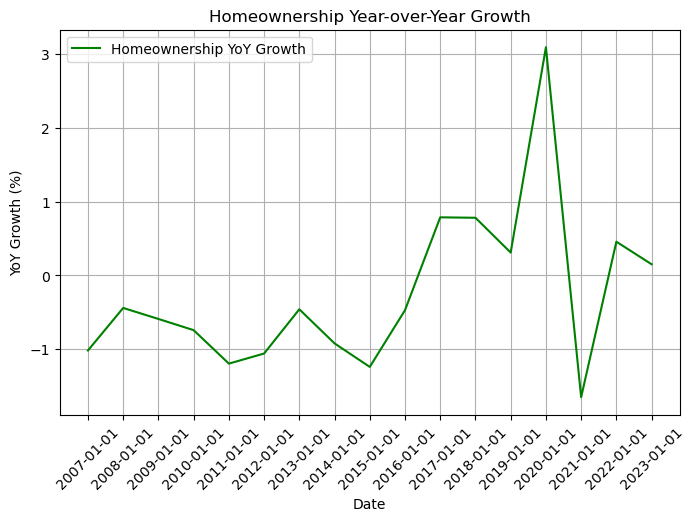

In [50]:
# Plotting the Homeownership YoY Growth
plt.figure(figsize=(8, 5))
plt.plot(Clean_Data_df['Date'], Clean_Data_df['Homeownership YoY Growth'], color='green', label='Homeownership YoY Growth')

# Adding labels and title
plt.xlabel('Year')
plt.title('Homeownership Year-over-Year Growth')
plt.xlabel('Date')
plt.ylabel('YoY Growth (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
# Display the plot
plt.legend()
plt.show()

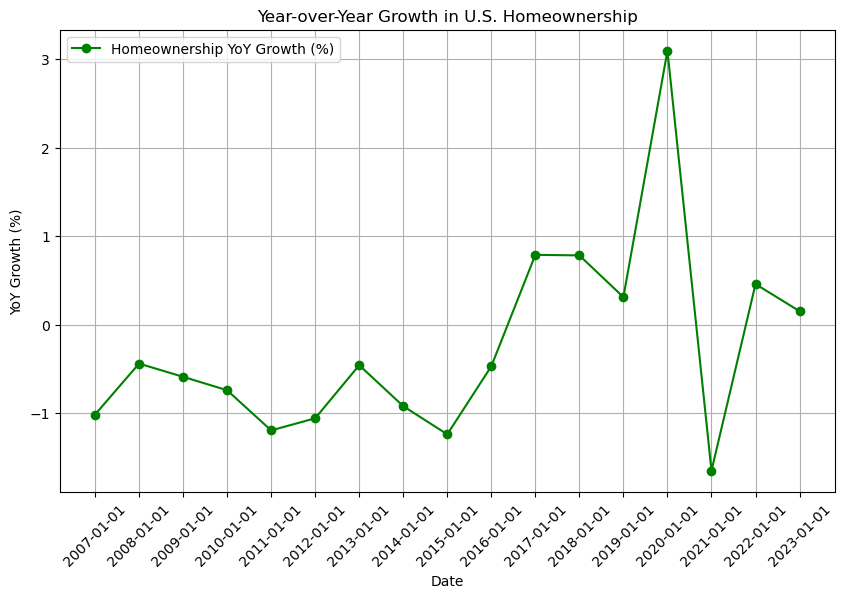

In [ ]:
#Year over year percentage growth in homeownership
Clean_Data_df['Homeownership YoY Growth'] = Clean_Data_df['US Homeownership'].pct_change() * 100


In [ ]:
correlation = Clean_Data_df['US Avg. Higher Edu'].corr(Clean_Data_df['US Homeownership'])


-0.45333575659064845

Text(0, 0.5, 'US Homeownership')

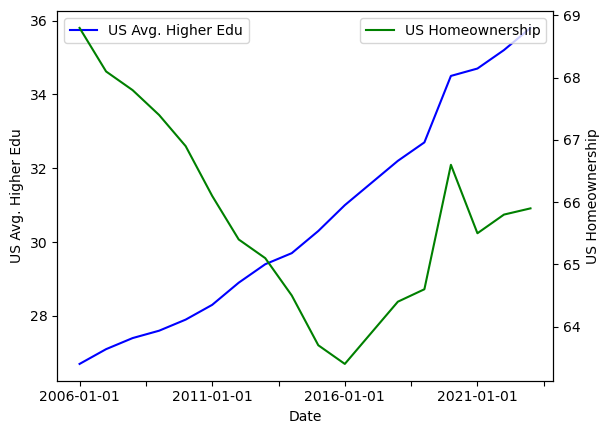

In [27]:
ax = Clean_Data_df.plot(x='Date', y='US Avg. Higher Edu', color='blue', legend=True)
ax2 = ax.twinx()
Clean_Data_df.plot(x='Date', y='US Homeownership', color='green', ax=ax2, legend=True)
ax.set_ylabel("US Avg. Higher Edu")
ax2.set_ylabel("US Homeownership")


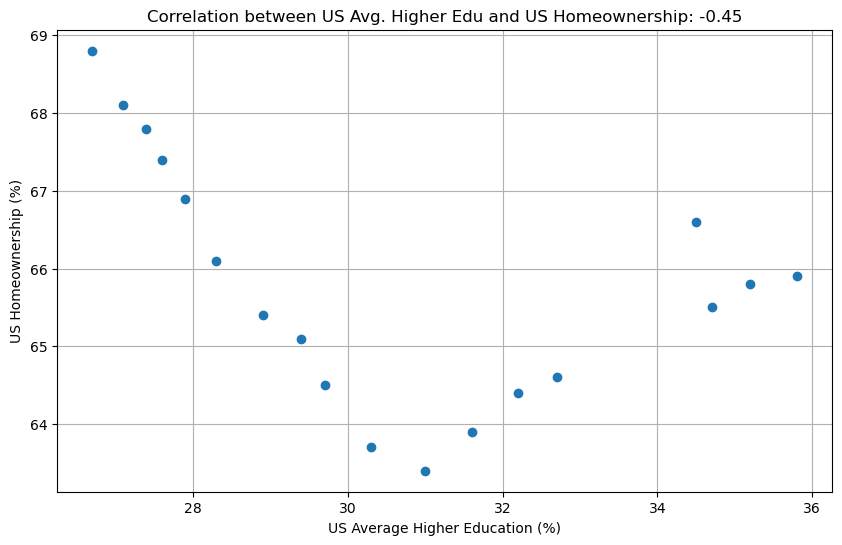

In [51]:
# Calculate the correlation
correlation = Clean_Data_df['US Avg. Higher Edu'].corr(Clean_Data_df['US Homeownership'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(Clean_Data_df['US Avg. Higher Edu'], Clean_Data_df['US Homeownership'], color='tab:blue')

# Adding labels and title
plt.xlabel('US Average Higher Education (%)')
plt.ylabel('US Homeownership (%)')
plt.title(f'Correlation between US Avg. Higher Edu and US Homeownership: {correlation:.2f}')

# Display the plot
plt.grid(True)
plt.show()


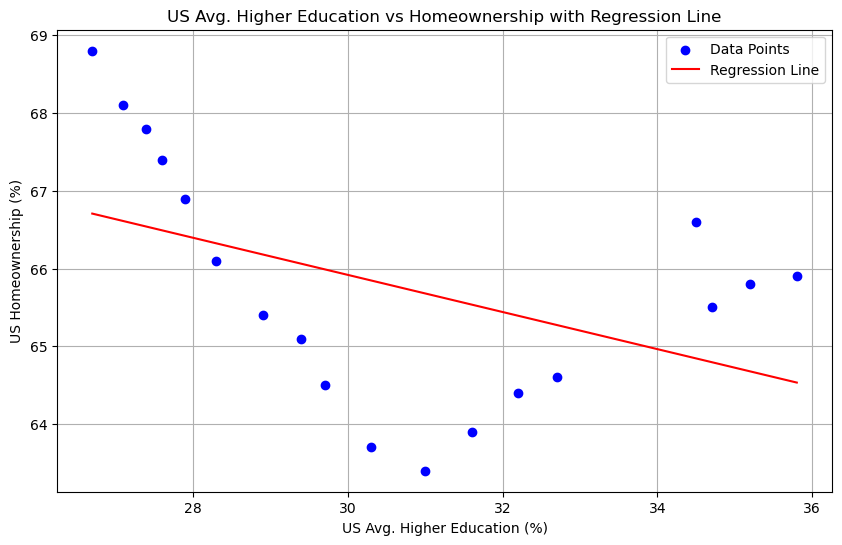

Regression Coefficient: -0.23874771028988456
Regression Intercept: 73.08055490942925


In [53]:
# Prepare the data for linear regression
X = Clean_Data_df['US Avg. Higher Edu'].values.reshape(-1, 1)  # Independent variable
y = Clean_Data_df['US Homeownership'].values  # Dependent variable

# Create the linear regression model and fit it
model = LinearRegression()
model.fit(X, y)

# Get the regression line
y_pred = model.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(10,6))
plt.scatter(Clean_Data_df['US Avg. Higher Edu'], Clean_Data_df['US Homeownership'], color='b', label='Data Points')
plt.plot(Clean_Data_df['US Avg. Higher Edu'], y_pred, color='r', label='Regression Line')
plt.xlabel('US Avg. Higher Education (%)')
plt.ylabel('US Homeownership (%)')
plt.title('US Avg. Higher Education vs Homeownership with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

# Display the regression coefficient and intercept
print(f"Regression Coefficient: {model.coef_[0]}")
print(f"Regression Intercept: {model.intercept_}")


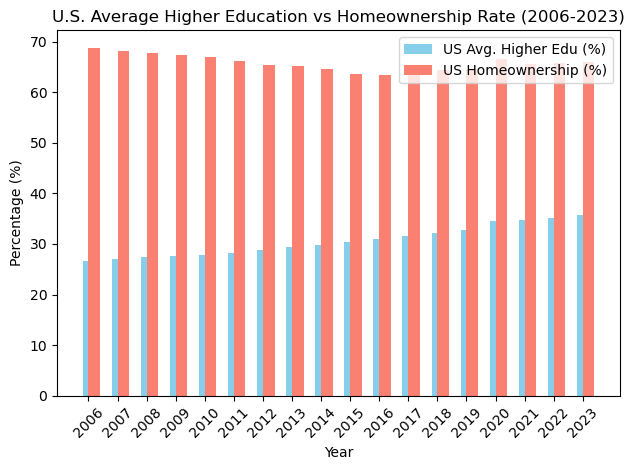

In [68]:
#stacked bar graph
Clean_Data_df['Date'] = pd.to_datetime(Clean_Data_df['Date'])

x = range(len(Clean_Data_df))

# Plot US Avg. Higher Edu
plt.bar(x, Clean_Data_df['US Avg. Higher Edu'], width=0.4, label='US Avg. Higher Edu (%)', color='skyblue', align='center')

# Plot US Homeownership
plt.bar(x, Clean_Data_df['US Homeownership'], width=0.4, label='US Homeownership (%)', color='salmon', align='edge')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('U.S. Average Higher Education vs Homeownership Rate (2006-2023)')

# Set x-ticks to show the years
plt.xticks(x, Clean_Data_df['Date'].dt.year, rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()